# CREDIT SCORE CLASSIFICATION MODEL DEVELOPMENT

## Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
import warnings
warnings.filterwarnings('ignore')

## LOADING THE DATASET

In [2]:
data=pd.read_csv(r"C:\Users\jenan\Downloads\credit.csv")

## Checking the basic details of the dataset

In [3]:
#To display the first five rows of the dataset
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [4]:
#To find the number of rows and columns in the dataset
data.shape

(100000, 28)

In [5]:
#To find the column names
data.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
#To get informations such as number of columns,column names,number of non-null cells in each column,datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [7]:
#To get statistical summary of numerical columns
data.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


## DATA CLEANING

## Removing unwanted columns

In [8]:
data=data.drop(['ID','Customer_ID','SSN','Name'],axis=1)

## Detecting Duplicate values

In [9]:
#To find duplicate rows
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool

In [10]:
data.duplicated().unique()

array([False])

There are no duplicate rows.

## Detecting Missing values

In [11]:
data.isna().sum()

Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

There are no missing values.

## Detecting Outliers

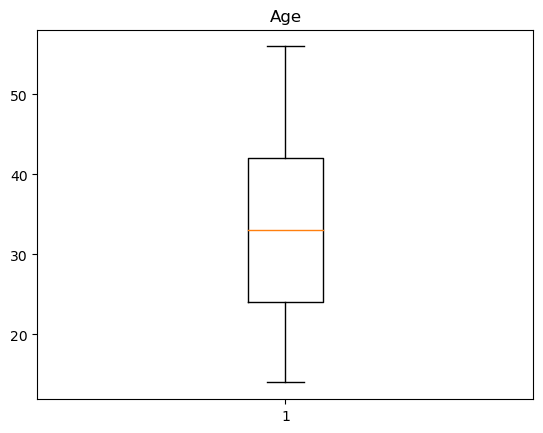

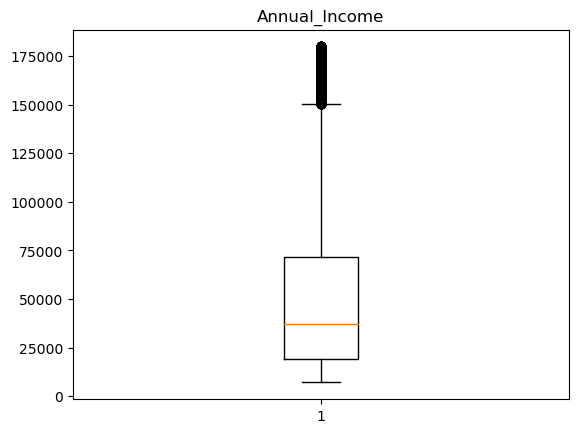

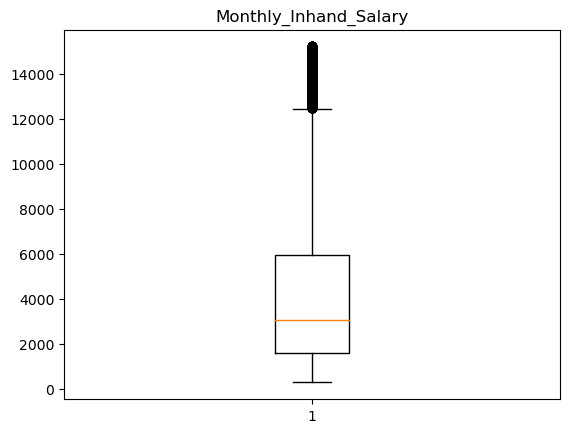

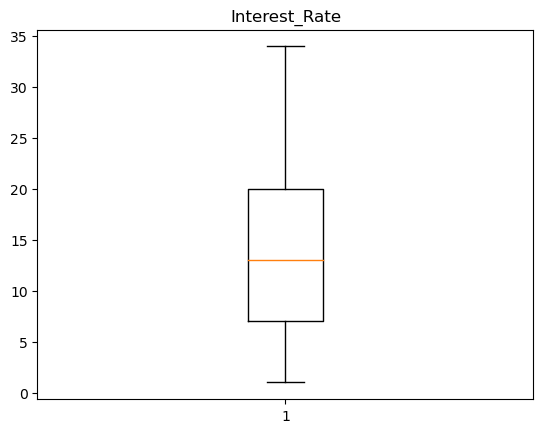

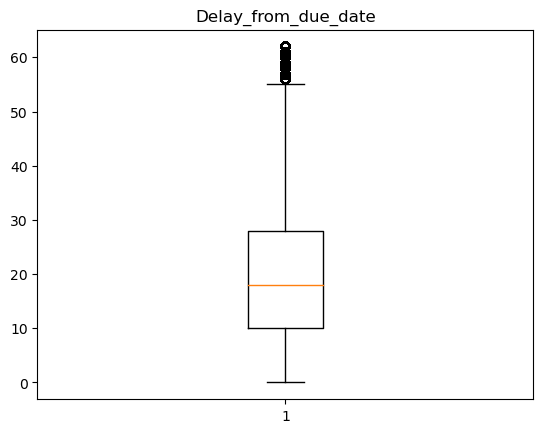

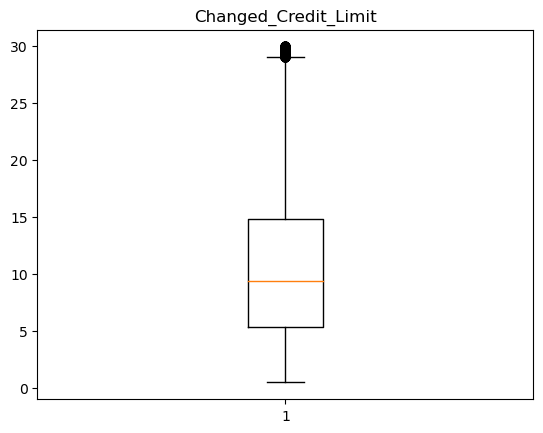

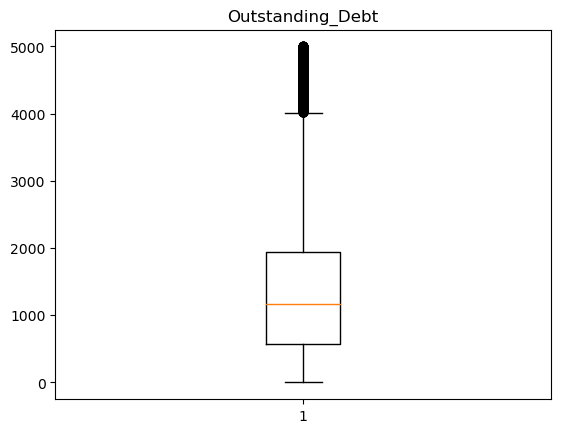

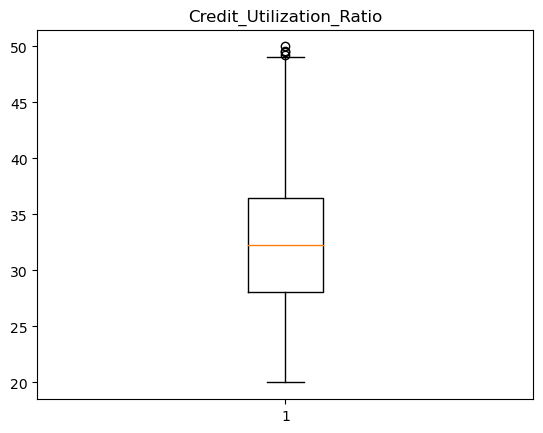

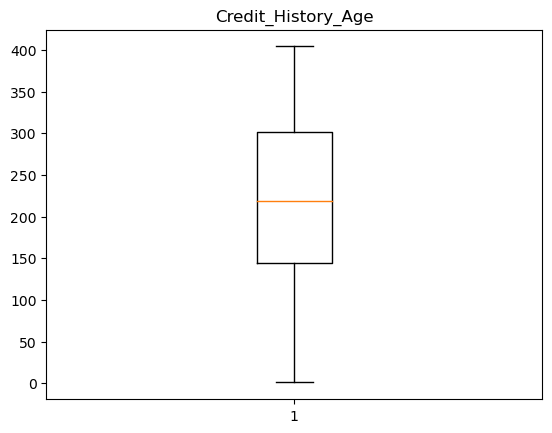

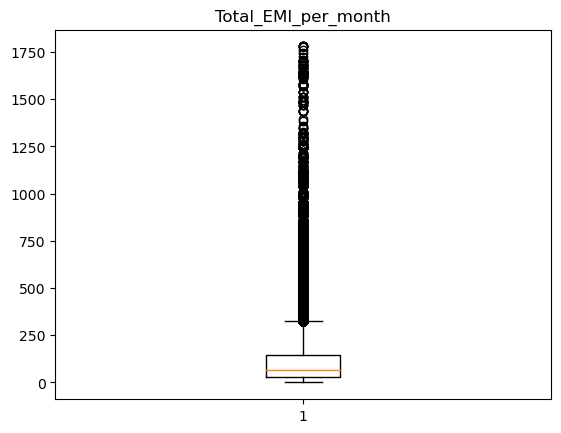

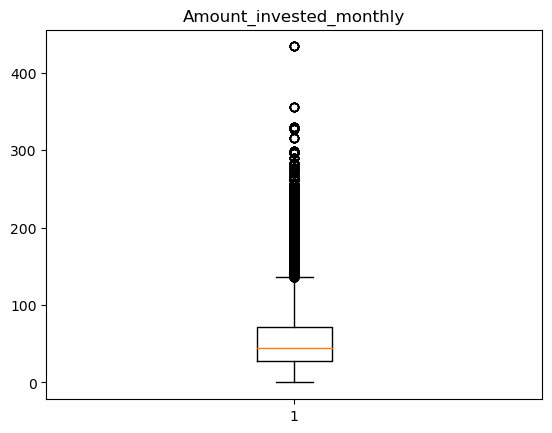

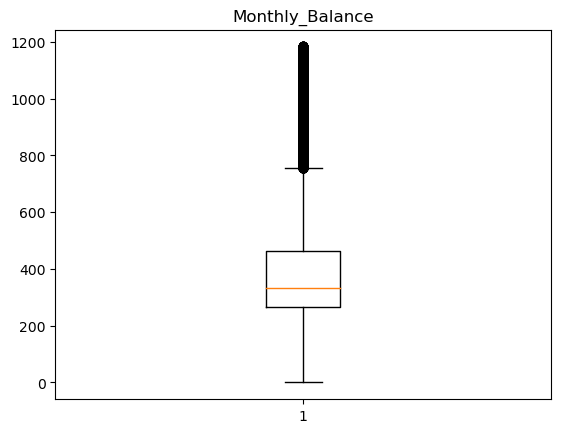

In [12]:
col=['Age','Annual_Income','Monthly_Inhand_Salary','Interest_Rate','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt',
     'Credit_Utilization_Ratio', 'Credit_History_Age','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)
plt.show()

There are many outliers in 'Annual_Income', 'Monthly_Inhand_Salary', 'Delay_from_due_date','Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_ Utilization_Ratio', 'Total_ EMI_ per_month', 'Amount_invested_monthly','Monthly_Balance'. But these are natural outliers which are not caused due to any errors and so they are not removed.

## EXPLORATORY DATA ANALYSIS

## Univariate Analysis

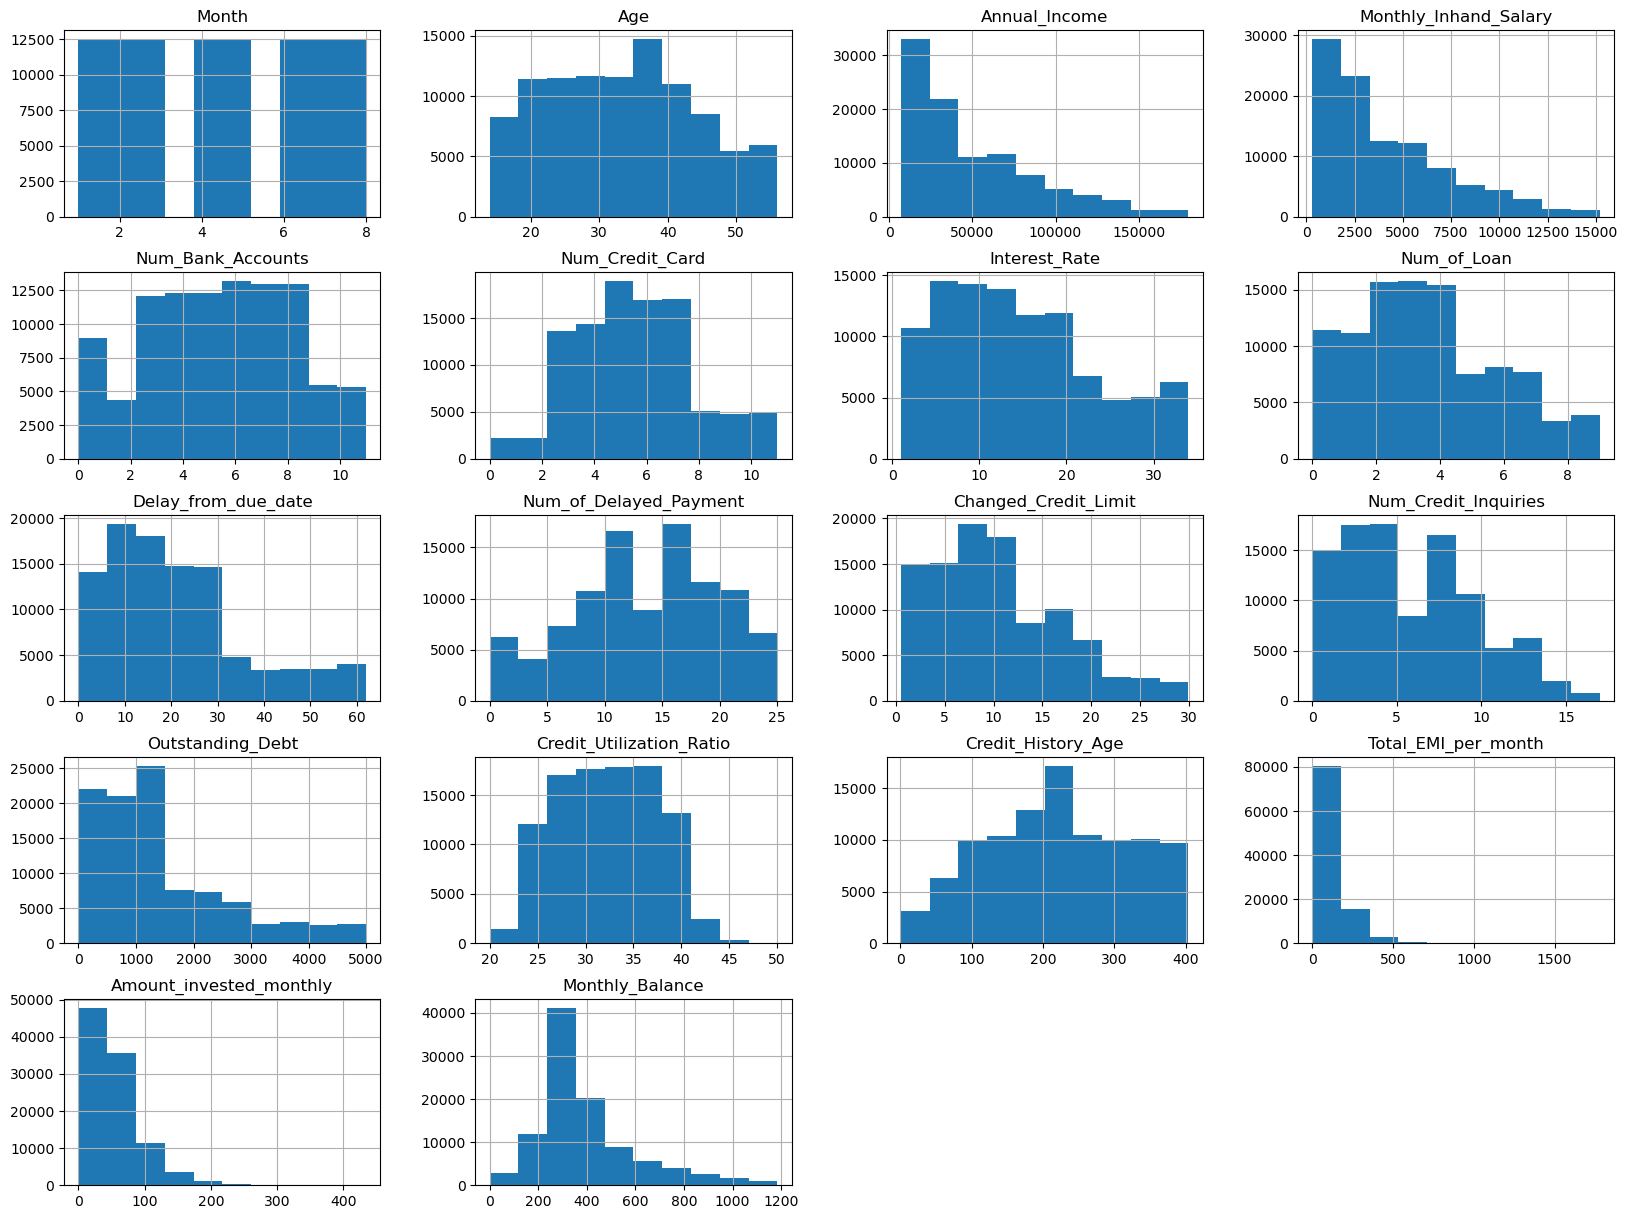

In [13]:
#Plotting histogram to analyse the distribution of numerical features
data.hist(figsize=(20,15))
plt.show()

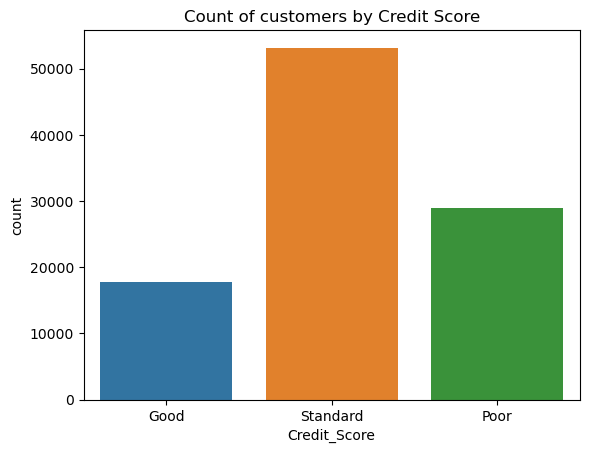

In [14]:
sns.countplot(x=data['Credit_Score'])
plt.title('Count of customers by Credit Score')
plt.show()

Most of the customers have Standard Credit score.

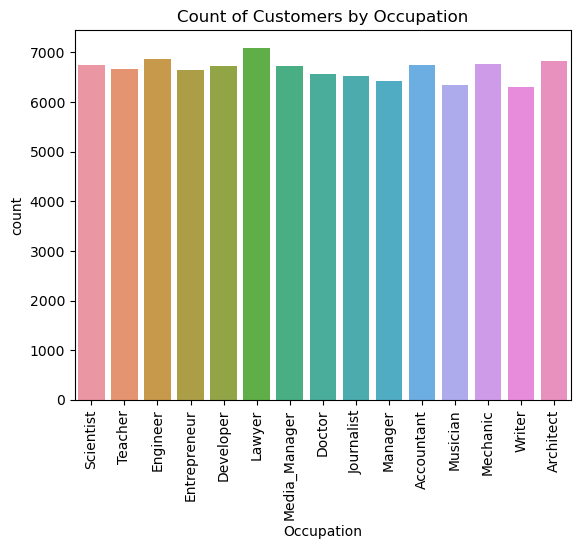

In [15]:
sns.countplot(x=data['Occupation'])
plt.xticks(rotation=90)
plt.title('Count of Customers by Occupation')
plt.show()

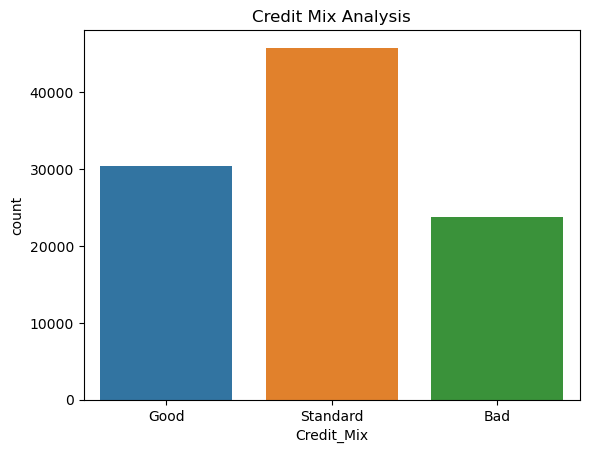

In [16]:
sns.countplot(x=data['Credit_Mix'])
plt.title('Credit Mix Analysis')
plt.show()

We can see that most of the customers have a 'Standard' Credit Mix.

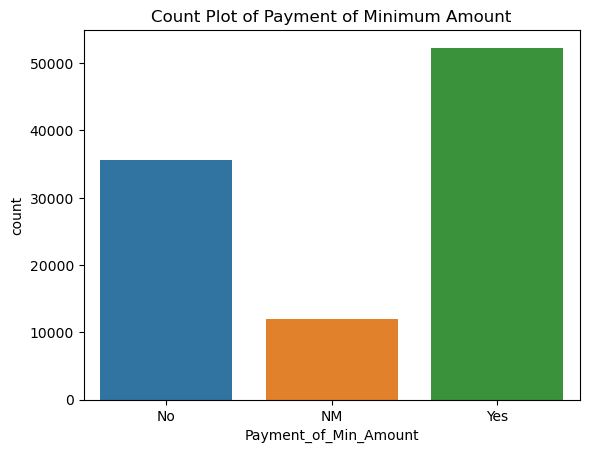

In [17]:
sns.countplot(x=data['Payment_of_Min_Amount'])
plt.title("Count Plot of Payment of Minimum Amount")
plt.show()

The above graph shows that most of the customer's paid a minimum amount for their loans.

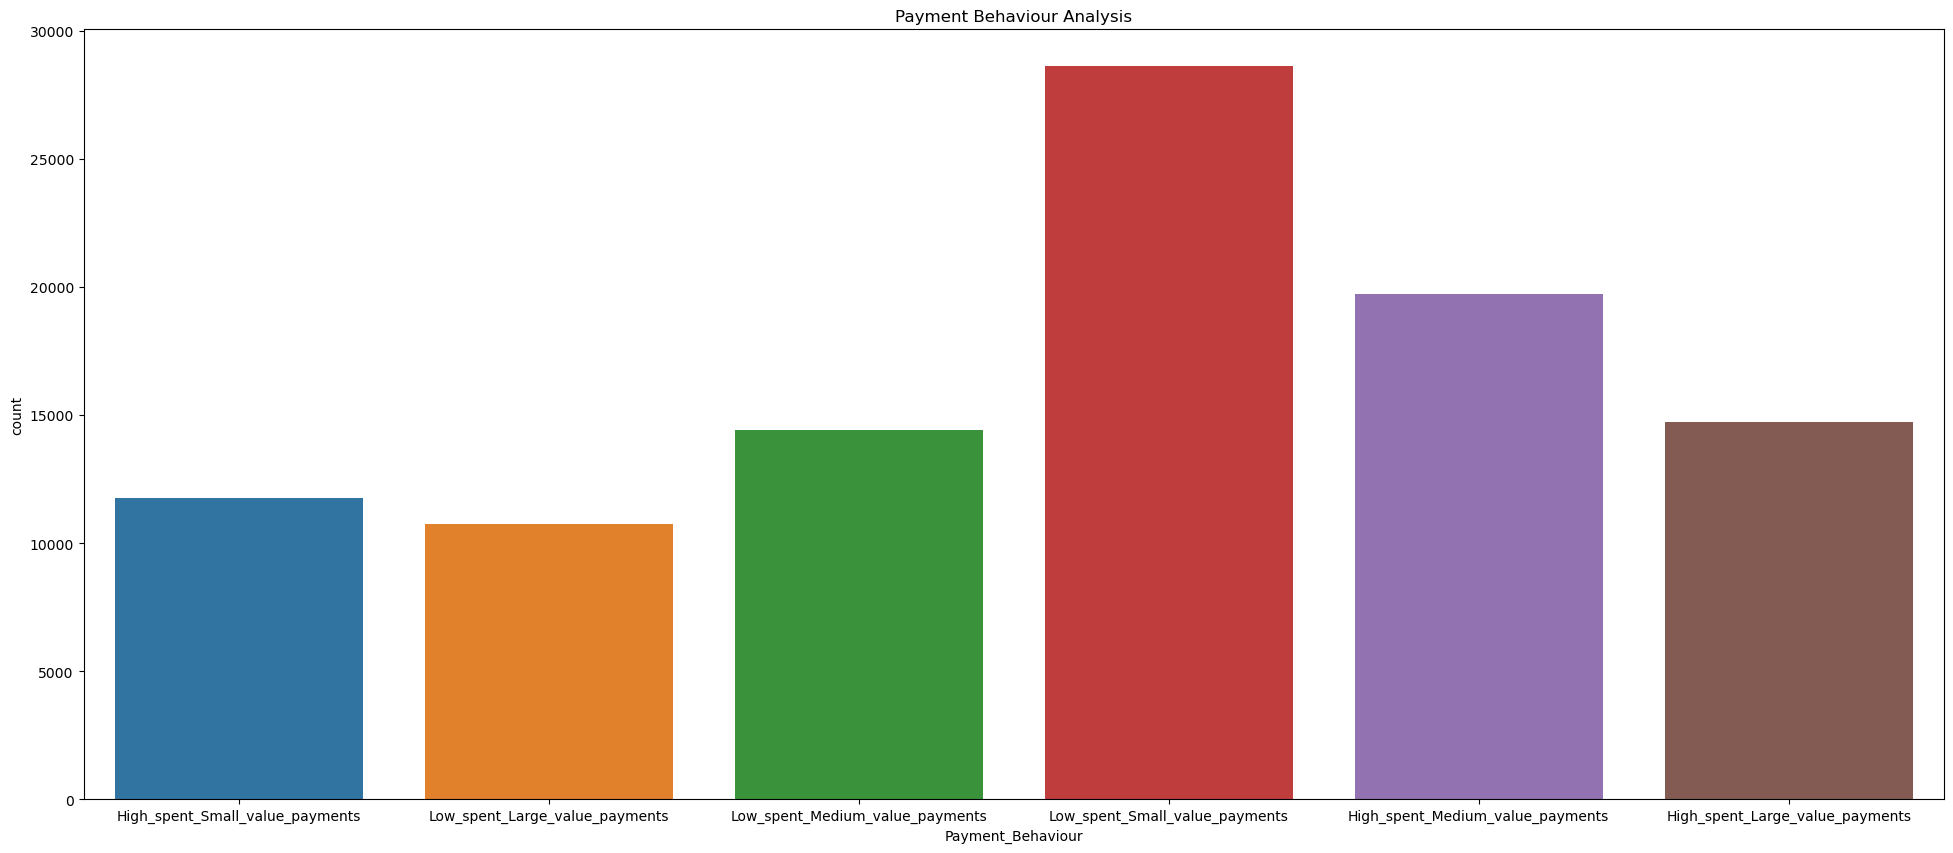

In [18]:
plt.figure(figsize=(24,10))
sns.countplot(x=data['Payment_Behaviour'])
plt.title('Payment Behaviour Analysis')
plt.show()

We can see that the payment behaviour of most of the customers is Low_spent_Small_value_payments.

## Bivariate Analysis

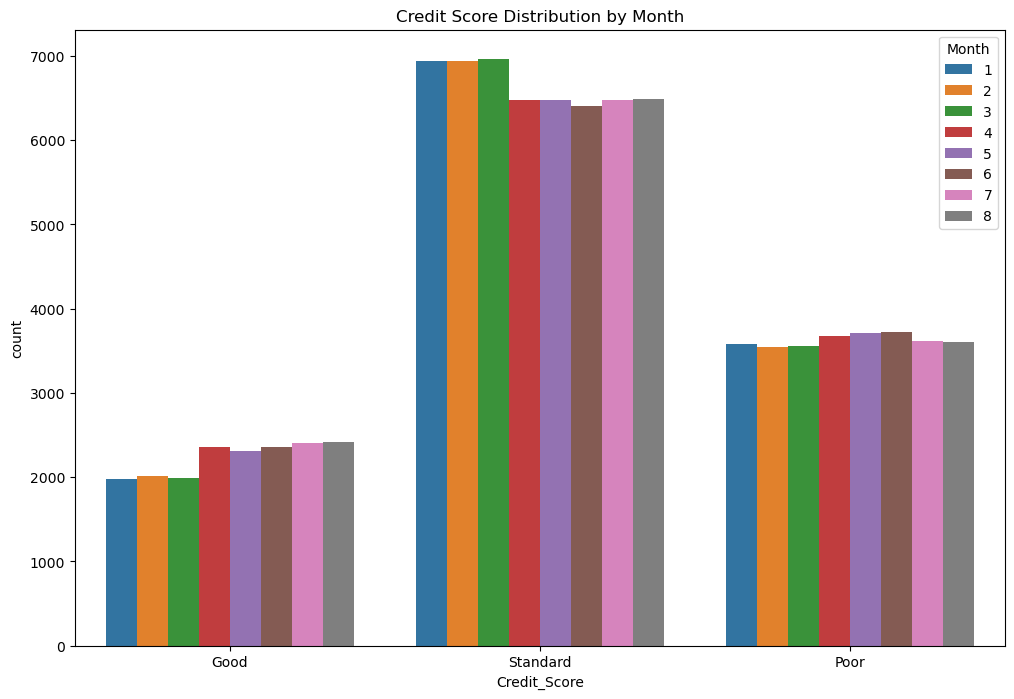

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Credit_Score', hue='Month', data=data)
plt.title('Credit Score Distribution by Month')
plt.show()

From the graph we can see that from the 4th month onwards number of customers having 'Good' credit score increases and those having 'Standard' credit score decreases.

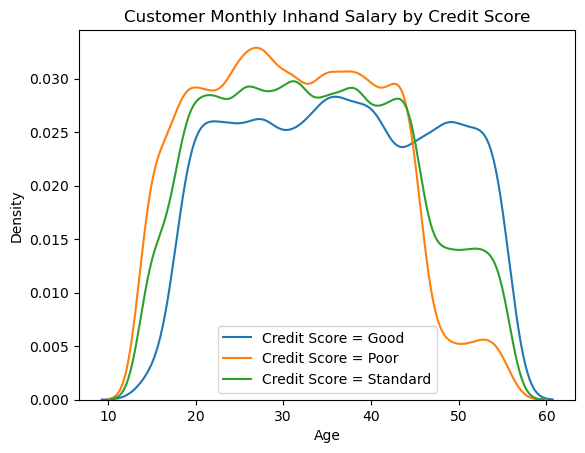

In [20]:
sns.kdeplot(data['Age'][data['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(data['Age'][data['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(data['Age'][data['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Age')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')
plt.show()

From the above graph we can see that customers between the age of 20 aand 55 are more probable to have 'Good' Credit Score.

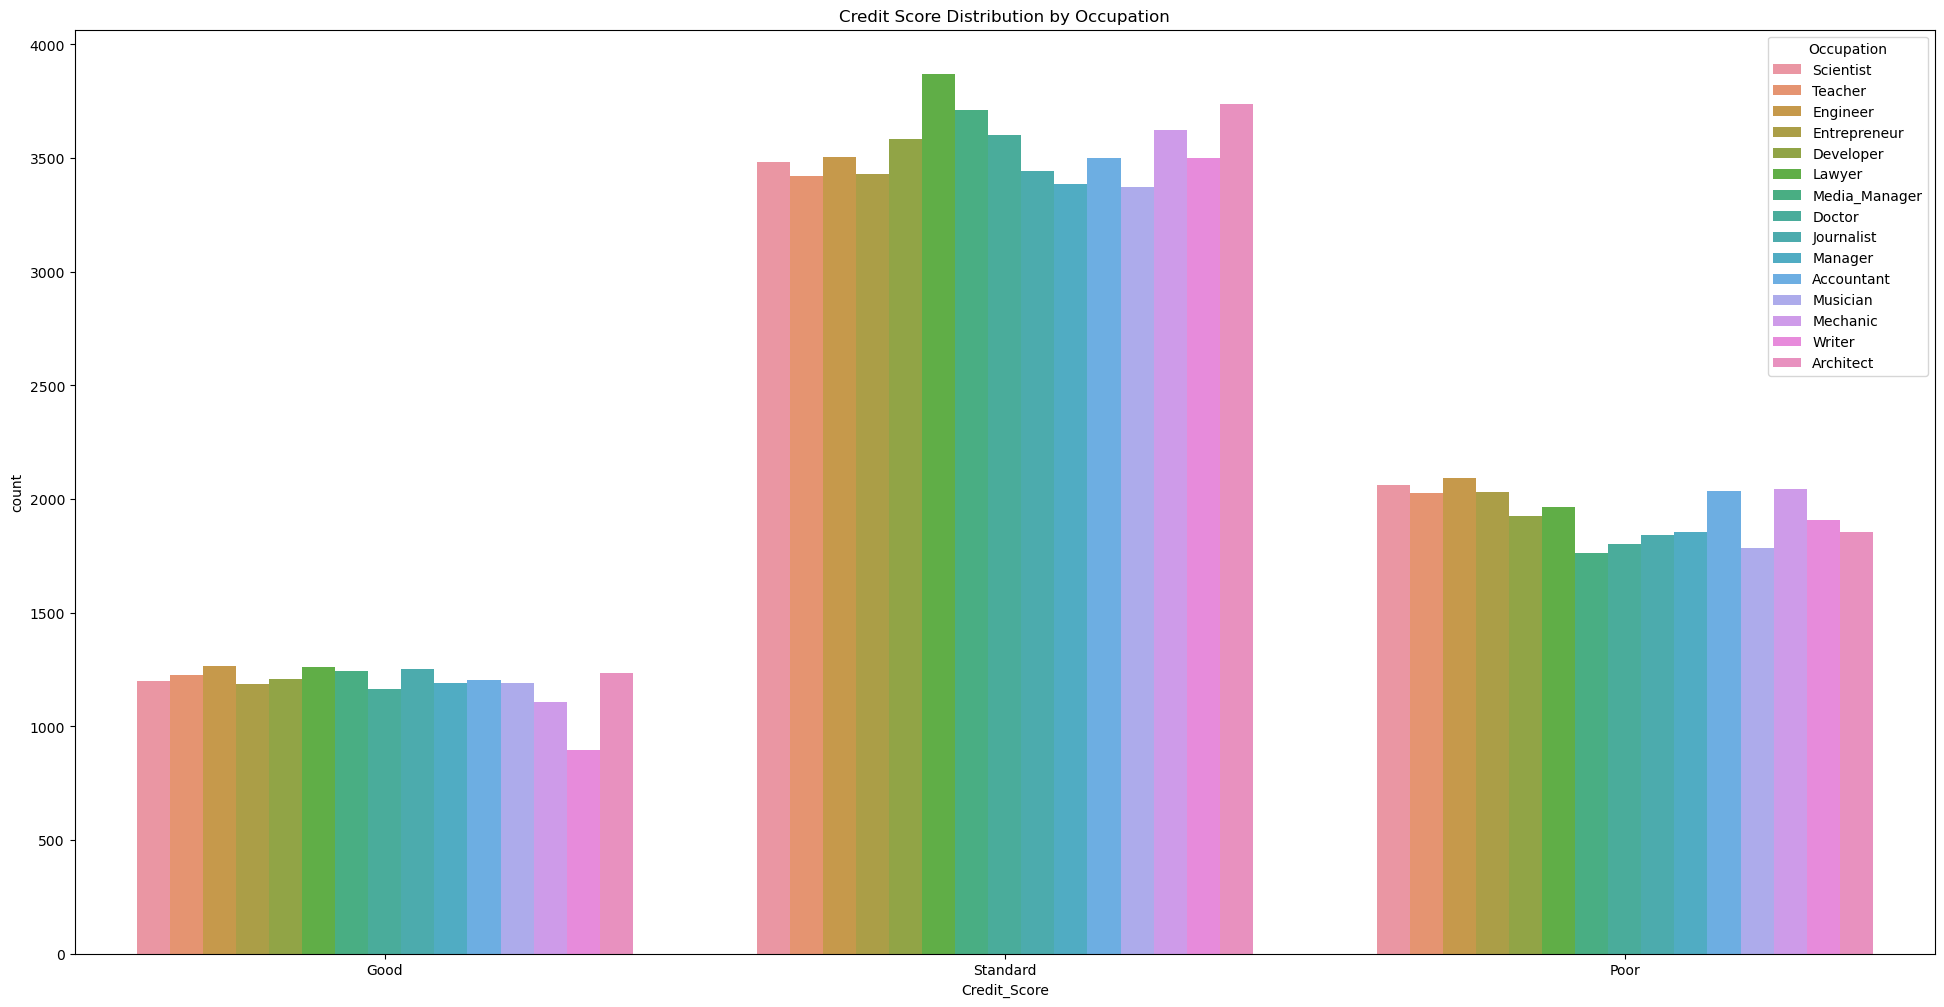

In [21]:
plt.figure(figsize=(24,12))
sns.countplot(x='Credit_Score',hue='Occupation',data=data)
plt.title('Credit Score Distribution by Occupation')
plt.show()

The above graph shows that only customers whose occupation is 'Writer' is less probable to have 'Good' credit score compared to customers engaged in other occupations.

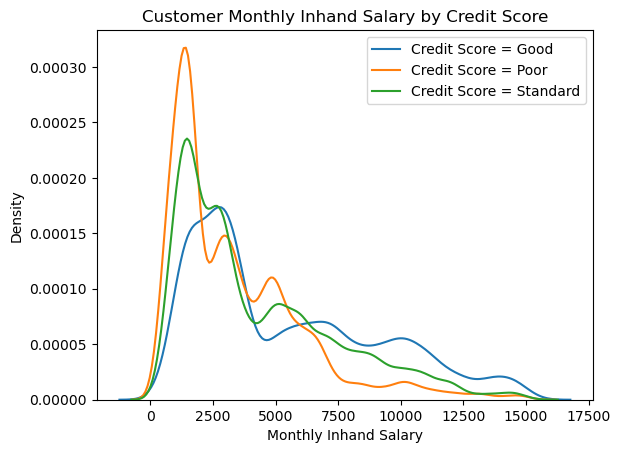

In [22]:
sns.kdeplot(data['Monthly_Inhand_Salary'][data['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(data['Monthly_Inhand_Salary'][data['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(data['Monthly_Inhand_Salary'][data['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Monthly Inhand Salary')
plt.legend()
plt.title('Customer Monthly Inhand Salary by Credit Score')
plt.show()

From the above graph, we can see that most of the customer's who have a Poor credit score have a low monthly inhand salary compared to the customers who have 'Standard' and 'Good' credit scores.

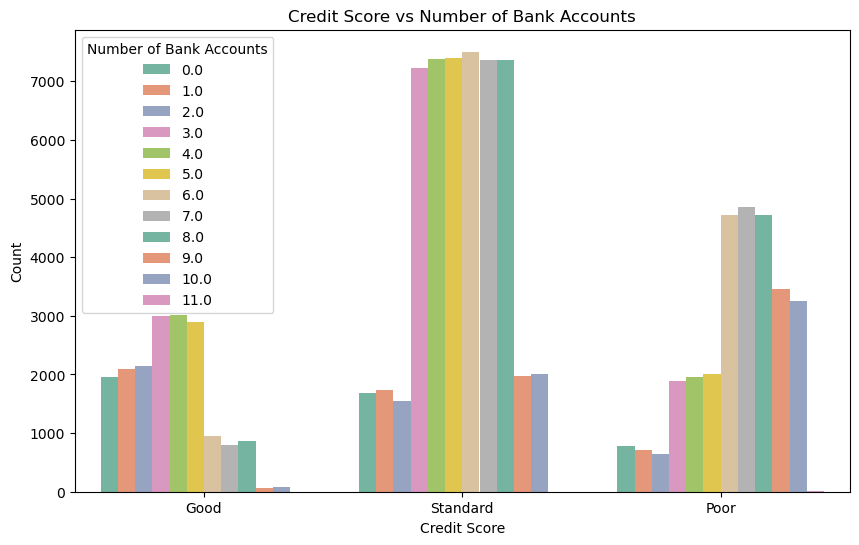

In [23]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', hue='Num_Bank_Accounts', data=data,palette='Set2', dodge=True, saturation=0.7)
plt.title('Credit Score vs Number of Bank Accounts')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Number of Bank Accounts', loc='upper left')
plt.show()

The above graph shows that having 3-5 bank accounts is best for having 'Good' Credit Score.

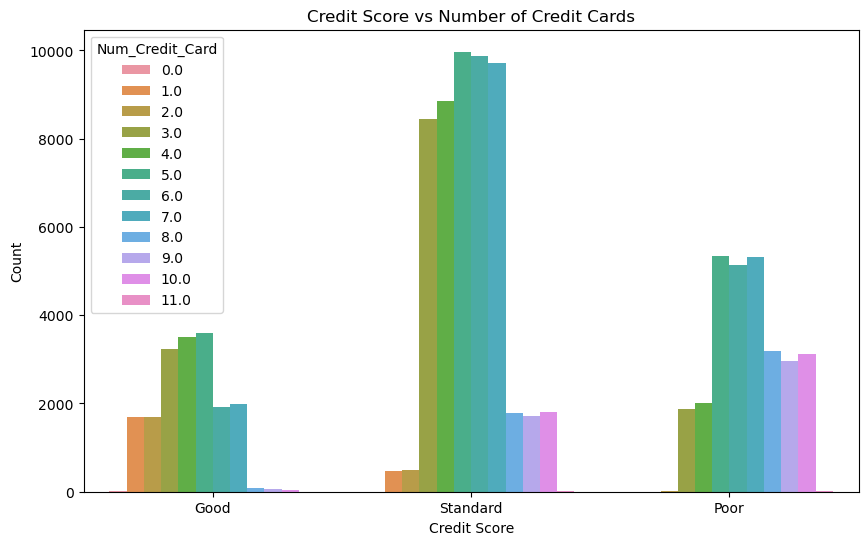

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', hue='Num_Credit_Card', data=data)
plt.title('Credit Score vs Number of Credit Cards')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

We can see that customers having more than 8 credit cards is less probable to have 'Good' Credit Score.

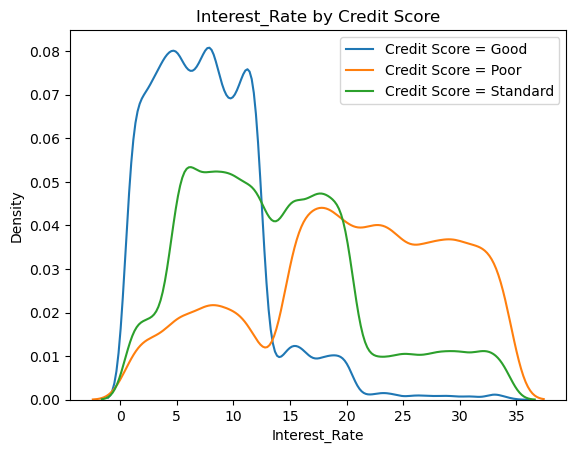

In [25]:
sns.kdeplot(data['Interest_Rate'][data['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(data['Interest_Rate'][data['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(data['Interest_Rate'][data['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Interest_Rate')
plt.legend()
plt.title('Interest_Rate by Credit Score')
plt.show()

From the above graph we can see that customers have 'Good' Credit Score when interest rate is less than 15 and as the interest rate increases the number of customers having 'Poor' Credit Score has a significant increase.

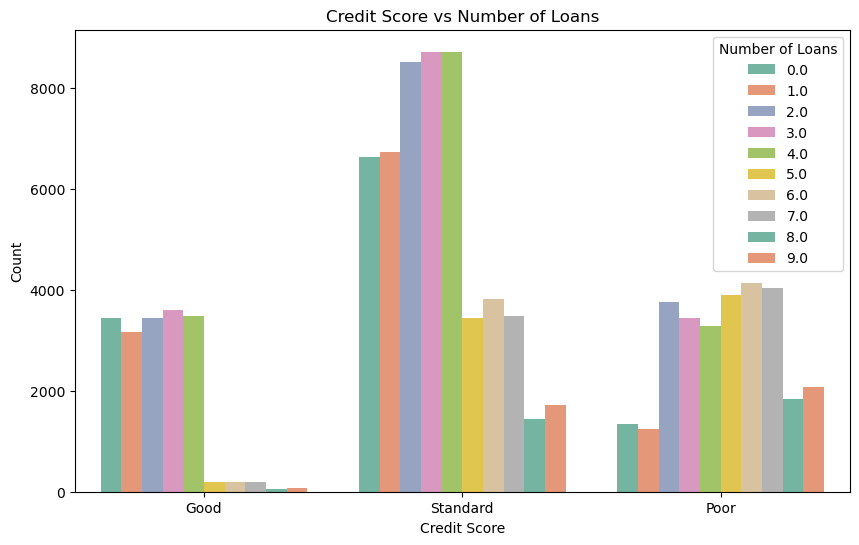

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', hue='Num_of_Loan', data=data,palette='Set2',dodge=True, saturation=0.7)
plt.title('Credit Score vs Number of Loans')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.legend(title='Number of Loans', loc='upper right')
plt.show()

The above graph shows that most of the customers who have 'Good' Credit Score have less than 5 loans and thus we can understand that having more loans can affect the Credit Score.

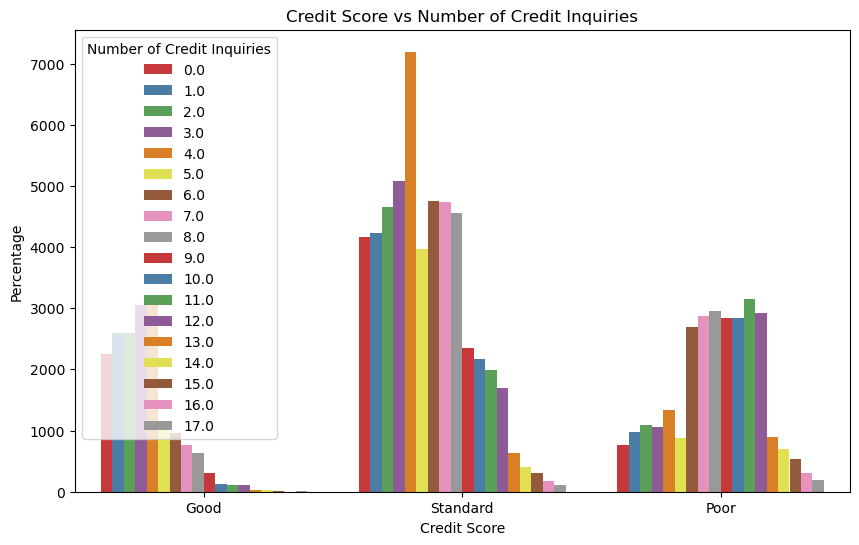

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', hue='Num_Credit_Inquiries', data=data,palette='Set1',dodge=True, saturation=0.7)
plt.title('Credit Score vs Number of Credit Inquiries')
plt.xlabel('Credit Score')
plt.ylabel('Percentage')
plt.legend(title='Number of Credit Inquiries', loc='upper left')
plt.show()

The graph shows that an increase in number of Credit Inquiries can negatively affect the Credit Score.

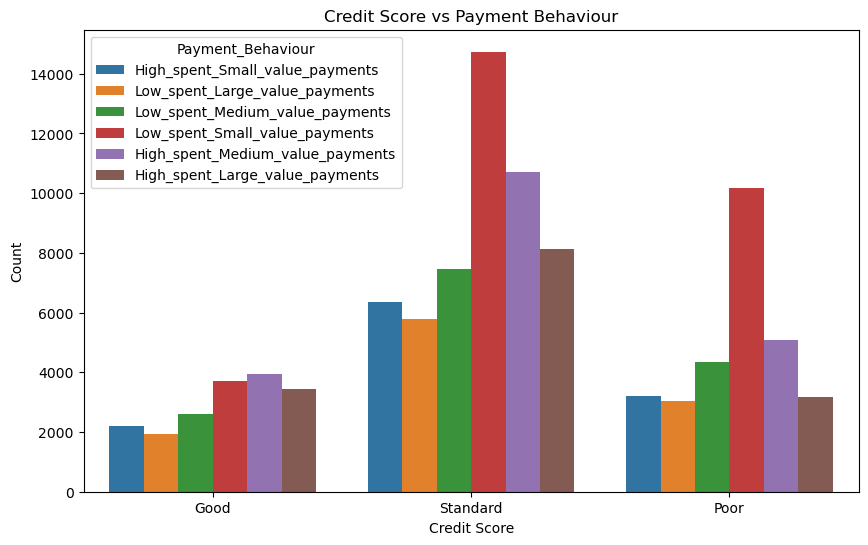

In [28]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Credit_Score', hue='Payment_Behaviour', data=data)
plt.title('Credit Score vs Payment Behaviour')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

From the above graph we can see that large number of customers having 'Standard' and 'Poor' Credit Score has Low Spent Small Value payment behaviour.

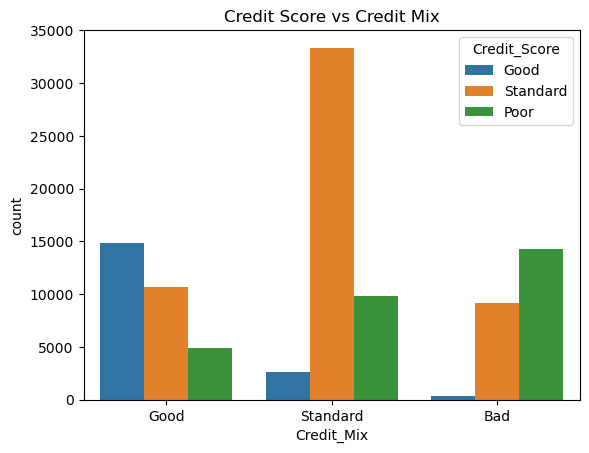

In [29]:
sns.countplot(x='Credit_Mix',data=data,hue='Credit_Score')
plt.title('Credit Score vs Credit Mix')
plt.show()

The above graph shows that most of the customers having 'Good' Credit Mix has 'Good' Credit Score,'Standard' Credit mix has 'Standard' Credit Score and 'Bad' Credit Mix has 'Poor' Credit Score.So we can understand that the columns - Credit_Mix and Credit_Score are almost similar.

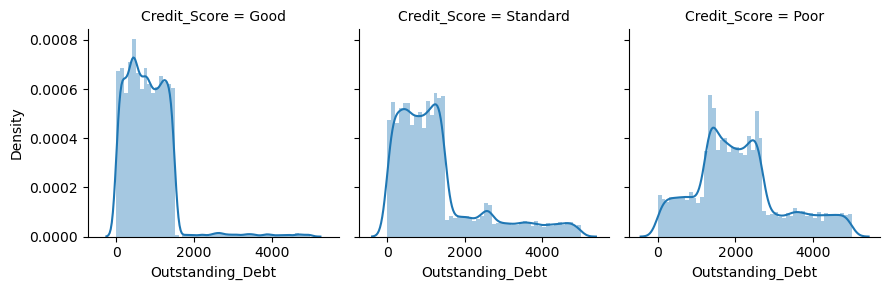

In [30]:
grid = sns.FacetGrid(data, col = 'Credit_Score')
grid.map(sns.distplot, 'Outstanding_Debt')
plt.show()

Customer's who have a Good credit score have very low outstanding debt compared to the customer's who have Standard and Poor credit score.

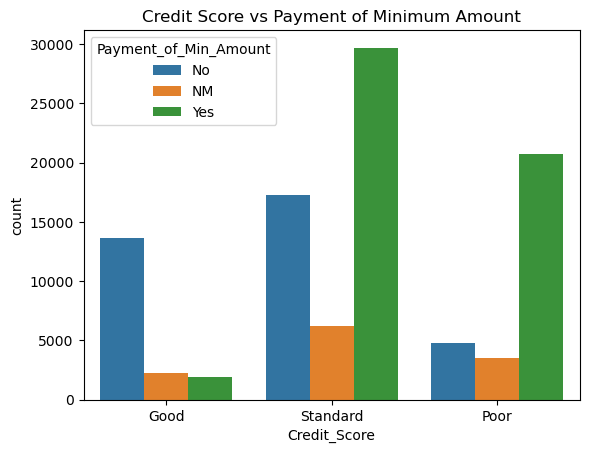

In [31]:
sns.countplot(x='Credit_Score',hue='Payment_of_Min_Amount',data=data)
plt.title('Credit Score vs Payment of Minimum Amount')
plt.show()

It can be seen that most of the customers with a good credit score didn't pay the minimum amount for the loan. Similarly, customers with a poor credit score paid minimum amount for the loan.

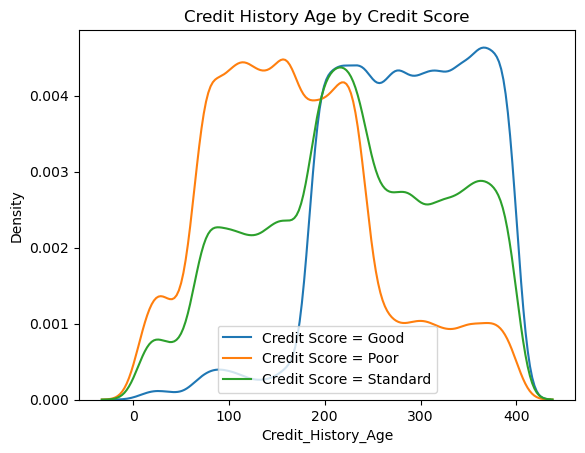

In [32]:
sns.kdeplot(data['Credit_History_Age'][data['Credit_Score'] == 'Good'], label = 'Credit Score = Good')
sns.kdeplot(data['Credit_History_Age'][data['Credit_Score'] == 'Poor'], label = 'Credit Score = Poor')
sns.kdeplot(data['Credit_History_Age'][data['Credit_Score'] == 'Standard'], label = 'Credit Score = Standard')
plt.xlabel('Credit_History_Age')
plt.legend()
plt.title('Credit History Age by Credit Score')
plt.show()

We can see that there is a significant increase in the density of 'Good' Credit Score as the credit history age increases.

## Checking Correlation

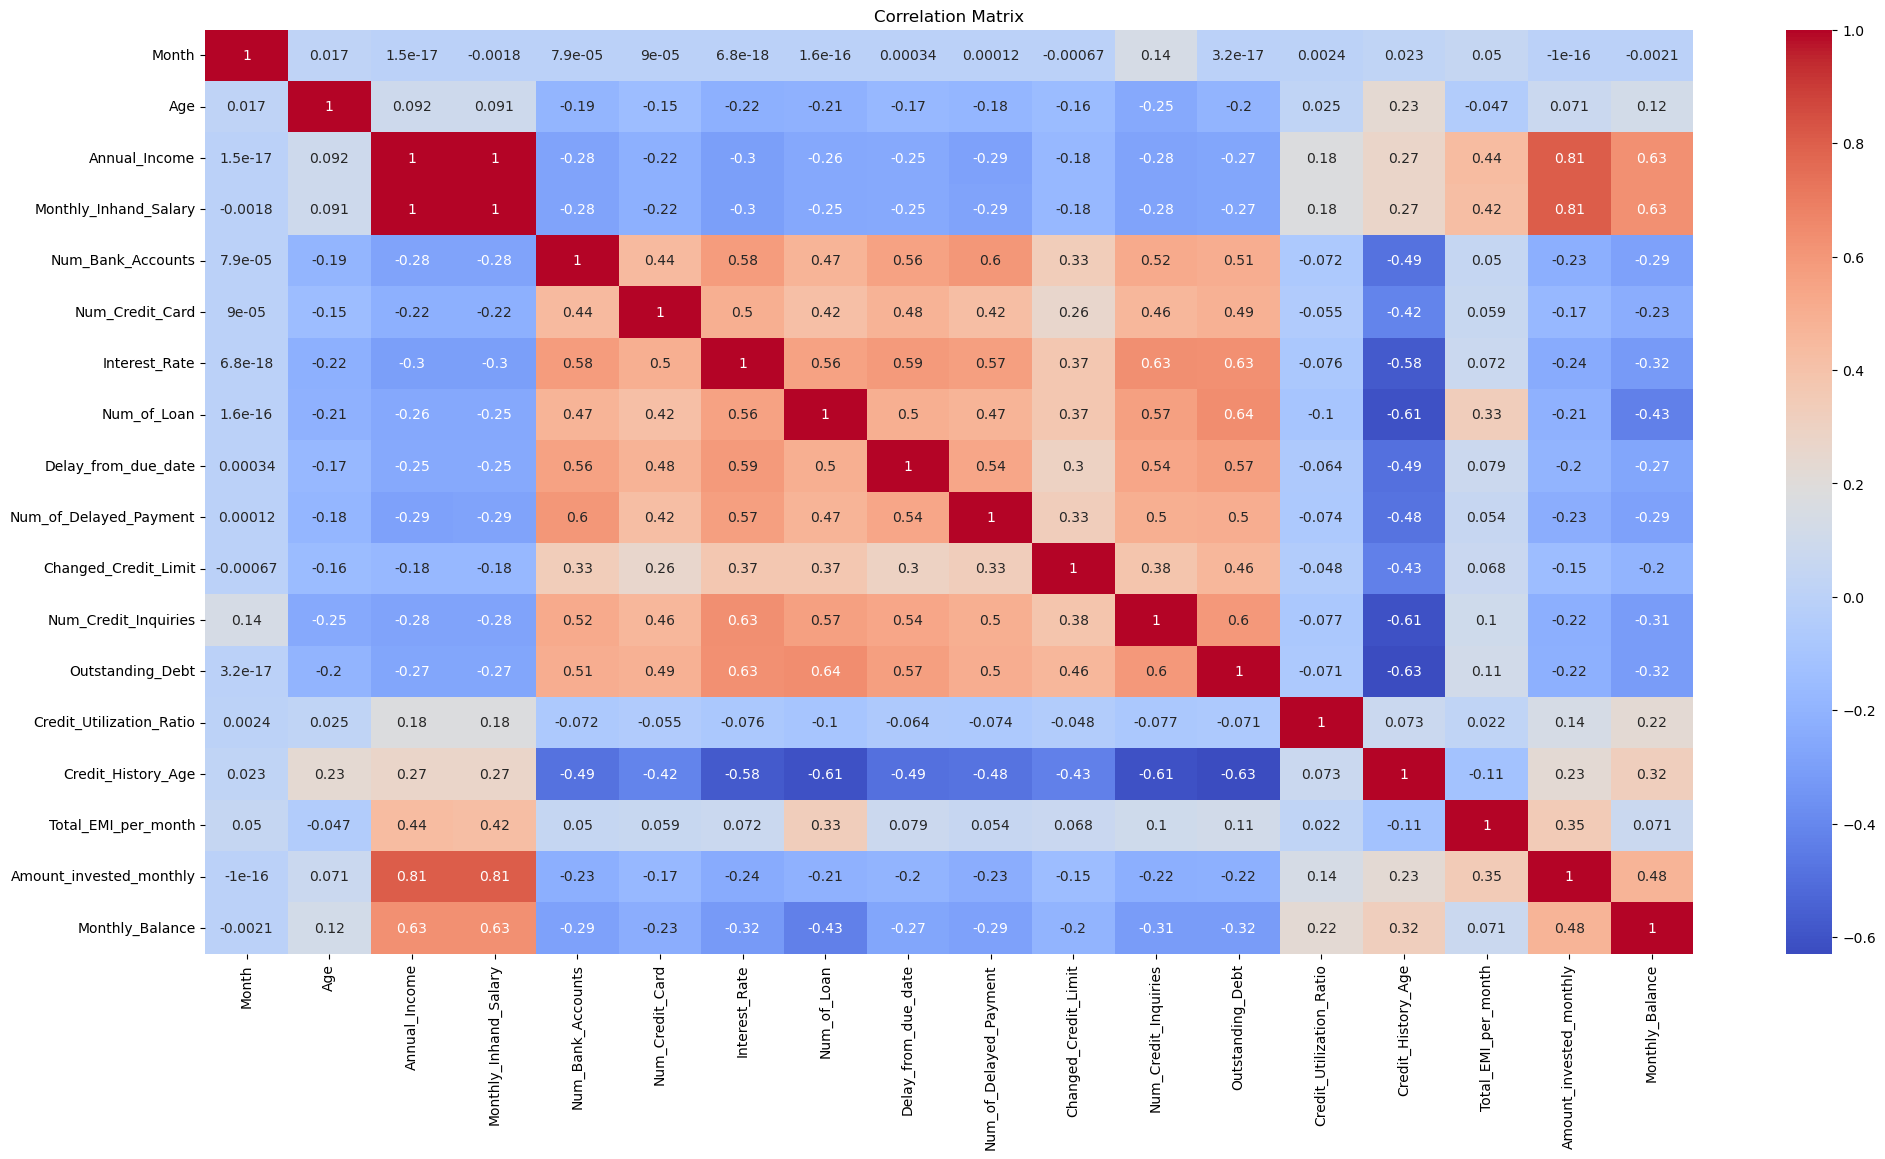

In [33]:
plt.figure(figsize=(24,12))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

From the correlation heatmap we can see that 
- There  is a perfect positive correlation  between 'Annual income' and 'Monthly inhand salary'.
- 'Annual income' and 'Amount invested monthly' are highly positively correlated.
- There is a notable positive correlation of 0.63 between 'Annual Income' and 'Monthly Balance'.
- 'Outstanding Debt' and 'Credit History Age' are negatively correlated.
- There exist a negative correlation of -0.61 between Number of loans and credit history age and also number of credit inquiries and credit history age.

# FEATURE ENGINEERING

### Extracting different types of loan from the feature 'Type_of_Loan' and creating new features

In [34]:
loan_type_data = list(data['Type_of_Loan'])
loan_type_data

['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Credit-Builder Loan',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan, Auto Loan, and Not Specified',
 'Auto Loan,

In [35]:
#Create a dictionary to store the counts of all the various loan types

loan_type_dict = dict()
for value in loan_type_data:
    values = value.split(',')
    for each_value in values:
        loan_type = each_value.strip(' ')
        if 'and' in loan_type:
            loan_type = loan_type[4 : ]
        if loan_type in loan_type_dict:
            loan_type_dict[loan_type] += 1
        else:
            loan_type_dict[loan_type] = 1

loan_type_dict

{'Auto Loan': 37992,
 'Credit-Builder Loan': 40440,
 'Personal Loan': 38888,
 'Home Equity Loan': 39104,
 'Not Specified': 39616,
 'No Data': 11408,
 'Mortgage Loan': 38936,
 'Student Loan': 38968,
 'Debt Consolidation Loan': 38776,
 'Payday Loan': 40568}

In [36]:
#Creating 8 different lists for each loan type

auto_loan = [0] * (len(data))
credit_builder_loan = [0] * (len(data))
personal_loan = [0] * (len(data))
home_equity_loan = [0] * (len(data))
mortgage_loan = [0] * (len(data))
student_loan = [0] * (len(data))
debt_consolidation_loan = [0] * (len(data))
payday_loan = [0] * (len(data))

In [37]:
#Using 0's and 1's if a customer has a particular loan

for index in range(len(loan_type_data)):
    #For Auto Loan
    if 'Auto' in loan_type_data[index]:
        auto_loan[index] = 1
    
    #For Credit Builder Loan
    if 'Credit-Builder' in loan_type_data[index]:
        credit_builder_loan[index] = 1
        
    #For Personal Loan
    if 'Personal' in loan_type_data[index]:
        personal_loan[index] = 1
    
    #For Home Equity Loan
    if 'Home' in loan_type_data[index]:
        home_equity_loan[index] = 1
    
    #For Mortgage Loan
    if 'Mortgage' in loan_type_data[index]:
        mortgage_loan[index] = 1
    
    #For Student Loan
    if 'Student' in loan_type_data[index]:
        student_loan[index] = 1
        
    #For Debt Consolidation loan
    if 'Debt' in loan_type_data[index]:
        debt_consolidation_loan[index] = 1
    
    #For Payday loan
    if 'Payday' in loan_type_data[index]:
        payday_loan[index] = 1

In [38]:
#Adding the new columns to the dataset

data['Auto_Loan'] = auto_loan
data['Credit_Builder_Loan'] = credit_builder_loan
data['Personal_Loan'] = personal_loan
data['Home_Enquity_Loan'] = home_equity_loan
data['Mortgage_Loan'] = mortgage_loan
data['Student_Loan'] = student_loan
data['Debt_Consolidation_Loan'] = debt_consolidation_loan
data['Payday_Loan'] = payday_loan

In [39]:
#Removing the column - Type_of_loan
data.drop(['Type_of_Loan'], axis = 1, inplace = True)

### Extracting spending and payment behaviours from the feature 'Payment_Behaviour' and creating new features

In [40]:
data[['Spending_behaviour', 'temp']] = data['Payment_Behaviour'].str.split('_', expand=True, n=1)
data[['temp','Payment_behaviour']] = data['temp'].str.split('_', expand=True, n=1)
data[['Payment_behaviour','temp']] = data['Payment_behaviour'].str.split('_', expand=True, n=1)

In [41]:
#Removing the column - Payment_Behaviour and temp
data.drop(['Payment_Behaviour','temp'], axis = 1, inplace = True)

### Removing highly correlated features

In [42]:
#Finding highly correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [43]:
corr_features = correlation(data, 0.8)
corr_features

{'Amount_invested_monthly', 'Monthly_Inhand_Salary'}

In [44]:
#Dropping one from each pair of highly correlated features
data=data.drop(['Amount_invested_monthly', 'Monthly_Inhand_Salary'],axis=1)

## Encoding

In [45]:
#Label encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

label_encoders={}

to_encode=['Occupation','Credit_Mix','Payment_of_Min_Amount','Spending_behaviour','Payment_behaviour']
for col in to_encode:
    data[col]=le.fit_transform(data[col])
    
    label_encoders[col]=dict(zip(le.classes_,le.transform(le.classes_)))

In [46]:
print("\nMapping of Original Values to Encoded Values:")
for column, mapping in label_encoders.items():
    print(f"{column}:")
    print(mapping)
    print()


Mapping of Original Values to Encoded Values:
Occupation:
{'Accountant': 0, 'Architect': 1, 'Developer': 2, 'Doctor': 3, 'Engineer': 4, 'Entrepreneur': 5, 'Journalist': 6, 'Lawyer': 7, 'Manager': 8, 'Mechanic': 9, 'Media_Manager': 10, 'Musician': 11, 'Scientist': 12, 'Teacher': 13, 'Writer': 14}

Credit_Mix:
{'Bad': 0, 'Good': 1, 'Standard': 2}

Payment_of_Min_Amount:
{'NM': 0, 'No': 1, 'Yes': 2}

Spending_behaviour:
{'High': 0, 'Low': 1}

Payment_behaviour:
{'Large': 0, 'Medium': 1, 'Small': 2}



## Defining the dependent and independent variables

In [47]:
x=data.drop(['Credit_Score'],axis=1)
y=data['Credit_Score']

In [48]:
from collections import Counter
print('dataset shape :', Counter(y))

dataset shape : Counter({'Standard': 53174, 'Poor': 28998, 'Good': 17828})


The dataset has an imbalanced class distribution.So we apply Synthetic Minority Oversampling Technique to balance it.

## Synthetic Minority Oversampling Technique(SMOTE)

In [49]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(x, y)

print('Original dataset shape :', Counter(y))
print('Resample dataset shape :', Counter(y_smote))

Original dataset shape : Counter({'Standard': 53174, 'Poor': 28998, 'Good': 17828})
Resample dataset shape : Counter({'Good': 53174, 'Standard': 53174, 'Poor': 53174})


In [32]:
#Standardizing the features
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
X=std_scaler.fit_transform(x)
X=pd.DataFrame(X)

## DATA SPLITTING

In [50]:
#Dividing the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(x_smote, y_smote, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# BUILDING CLASSIFICATION MODELS

## LOGISTIC REGRESSION

In [51]:
#Defining and training(fitting) the logistic regression model using train data
from sklearn import linear_model
lr=linear_model.LogisticRegression()
lr_model=lr.fit(X_train,y_train)

In [52]:
#Predicting the output for the validation data using the fitted model
lr_pred_val=lr_model.predict(X_val)

In [53]:
#Evaluating the model using the metric accuracy score
print("Accuracy score on the validation set:",accuracy_score(y_val,lr_pred_val))

Accuracy score on the validation set: 0.5659478435305918


### Optimizing Hyperparameters

In [54]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [55]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best hyper parameters",best_params)
print("Best score",best_score)

Best hyper parameters {'C': 1, 'penalty': 'l2'}
Best score 0.5689249093270049


In [56]:
best_lr = grid_search.best_estimator_
best_lr_pred= best_lr.predict(X_val)

### Model Evaluation

In [57]:
print("Confusion matrix : \n",confusion_matrix(y_val,best_lr_pred))
print('Accuracy score on the validation set :',accuracy_score(y_val,best_lr_pred))

Confusion matrix : 
 [[6227  291 1416]
 [1447 5698  784]
 [4294 2154 1617]]
Accuracy score on the validation set : 0.5659478435305918


## K-NEAREST NEIGHBORS

In [58]:
from sklearn.neighbors import KNeighborsClassifier

#To choose the best value for K by finding the accuracy scores of the model for K values ranging from 3 to 14
metric_k=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(X_train,y_train)
    y_pred=classifier.predict(X_val)
    acc=accuracy_score(y_val,y_pred)
    metric_k.append(acc)
print("Accuracy scores for K values ranging from 3 to 14 : \n",metric_k)

Accuracy scores for K values ranging from 3 to 14 : 
 [0.8439067201604814, 0.8347960548311602, 0.8295720494817787, 0.8168672684720829, 0.8141089936476095, 0.7933383483784687, 0.7907054496823804, 0.7732781678368439, 0.7707288532263457, 0.7558508859913072, 0.7535523236375794, 0.7419759277833501]


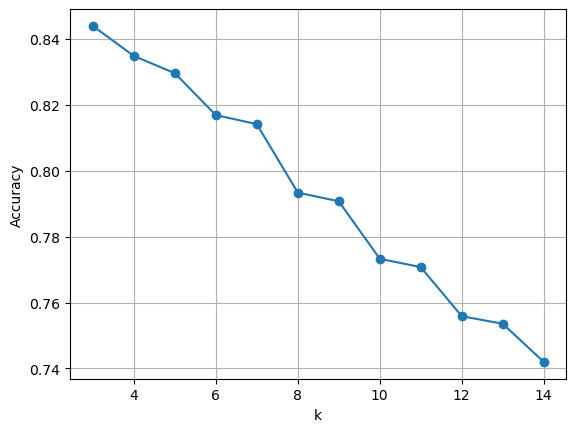

In [59]:
#Plotting the accuracy scores to find the best K value
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k')
plt.ylabel("Accuracy")
plt.grid()

In [60]:
#Defining and training(fitting) the KNN model with K=3 using train data
classifier=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [61]:
#Predicting the output for the validation data using the fitted model
knn_pred_val=classifier.predict(X_val)

In [62]:
#Evaluating the model using the metric accuracy score
knn_acc_val=accuracy_score(y_val,knn_pred_val)
print("Accuracy score on the validation set:",knn_acc_val)

Accuracy score on the validation set: 0.8439067201604814


### Optimizing Hyperparameters

In [63]:
# Define hyperparameters grid
param_grid = {'n_neighbors': range(1, 20), 'p': [1, 2]}

In [64]:
# Perform GridSearchCV
grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(metric='euclidean', n_neighbors=3),
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2]},
             scoring='accuracy')

In [65]:
# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best hyperparameters: {'n_neighbors': 1, 'p': 1}
Best accuracy: 0.842797653696324


In [66]:
best_knn = grid_search.best_estimator_
best_knn_pred = best_knn.predict(X_val)

### Model Evaluation

In [67]:
print("Confusion matrix : \n",confusion_matrix(y_val,best_knn_pred))
print('Accuracy score on the validation set :',accuracy_score(y_val,best_knn_pred))

Confusion matrix : 
 [[7314   23  597]
 [  18 6963  948]
 [ 893 1198 5974]]
Accuracy score on the validation set : 0.8463306586425945


## DECISION TREE

In [68]:
#Defining and training(fitting) the decion tree model using train data
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_model=dt_cls.fit(X_train,y_train)

In [69]:
#Predicting the output for the validation data using the fitted model
dt_pred_val=dt_model.predict(X_val)

In [70]:
#Evaluating the model using the metric accuracy score
dt_acc_val=accuracy_score(y_val,dt_pred_val)
print("Accuracy score on the validation set :",dt_acc_val)

Accuracy score on the validation set : 0.7961384152457373


### Optimizing Hyperparameters

In [71]:
# Define hyperparameters grid
param_grid = {'max_depth': range(1, 10),
              'min_samples_split': range(2, 10),
              'min_samples_leaf': range(1, 5)}


In [72]:
# Perform GridSearchCV
grid_search = GridSearchCV(dt_cls, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

In [73]:
# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best accuracy: 0.7540948372363767


In [74]:
best_dt= grid_search.best_estimator_
best_dt_pred = best_dt.predict(X_val)

### Model Evaluation

In [75]:
print("Confusion matrix : \n",confusion_matrix(y_val,best_dt_pred))
print('Accuracy score on the validation set :',accuracy_score(y_val,best_dt_pred))

Confusion matrix : 
 [[6980  232  722]
 [ 884 6190  855]
 [1564 1676 4825]]
Accuracy score on the validation set : 0.7520478100969575


## RANDOM FOREST

In [76]:
#Defining and training(fitting) the random forest model using train data
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
model_rf=rf_cls.fit(X_train,y_train)

In [77]:
#Predicting the output for the validation data using the fitted model
rf_pred_val=model_rf.predict(X_val)

In [78]:
#Evaluating the model using the metric accuracy score
rf_acc=accuracy_score(y_val,rf_pred_val)
print("Accuracy score on the validation set :",rf_acc)

Accuracy score on the validation set : 0.8726596456034771


### Optimizing Hyperparameters

In [79]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [80]:
# Perform GridSearchCV
grid_search = GridSearchCV(rf_cls, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [81]:
# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.8682308691174494


In [82]:
best_rf= grid_search.best_estimator_
best_rf_pred= best_rf.predict(X_val)

### Model Evaluation

In [83]:
print("Confusion matrix : \n",confusion_matrix(y_val,best_rf_pred))
print('Accuracy score on the validation set :',accuracy_score(y_val,best_rf_pred))

Confusion matrix : 
 [[7587   33  314]
 [ 244 7218  467]
 [ 907 1069 6089]]
Accuracy score on the validation set : 0.8732029421598128


## EXTRA TREES CLASSIFIER

In [111]:
#Defining and training(fitting) the extra trees model using train data
from sklearn.ensemble import ExtraTreesClassifier
xt_cls=ExtraTreesClassifier()
xt_model=xt_cls.fit(X_train,y_train)

In [112]:
#Predicting the output for the validation data using the fitted model
y_pred_xt=xt_model.predict(X_val)

In [113]:
#Evaluating the model using the metric accuracy score
xt_acc_val=accuracy_score(y_val,y_pred_xt)
print("Accuracy score :",xt_acc_val)

Accuracy score : 0.8802657973921765


### Optimizing Hyperparameters

In [114]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

In [123]:
from sklearn.model_selection import GridSearchCV
# Perform GridSearchCV
grid_search = GridSearchCV(xt_cls, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'max_depth': [None, 5], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [124]:
# Print best hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy:", grid_search.best_score_)

Best hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy: 0.8744190211794207


In [125]:
best_xt= grid_search.best_estimator_
best_xt_pred = best_xt.predict(X_val)

### Model Evaluation

In [126]:
print("Confusion matrix : \n",confusion_matrix(y_val,best_xt_pred))
print('Accuracy score on the validation set :',accuracy_score(y_val,best_xt_pred))

Confusion matrix : 
 [[7582   22  330]
 [ 208 7208  513]
 [ 847  966 6252]]
Accuracy score on the validation set : 0.8793881644934805


## Comparing the performance of all the models

In [127]:
#Creating a dataframe for model and accuracy and sorting it in descending order of accuracy
results=pd.DataFrame({'Model':['Logisic Regression','K-Nearest Neighbor','Decision Tree','Random Forest','Extra Trees'],
                      'Accuracy Score':[accuracy_score(y_val,lr_pred_val),accuracy_score(y_val,knn_pred_val),accuracy_score(y_val,dt_pred_val),
                                       accuracy_score(y_val,rf_pred_val),accuracy_score(y_val,y_pred_xt)],
                     'Accuracy Score(After tuning)':[accuracy_score(y_val,best_lr_pred),accuracy_score(y_val,best_knn_pred),
                                                    accuracy_score(y_val,best_dt_pred),accuracy_score(y_val,best_rf_pred),
                                                    accuracy_score(y_val,best_xt_pred)]})
results=results.sort_values(by='Accuracy Score',ascending=False)
results=results.set_index('Model')
results

,Accuracy Score,Accuracy Score(After tuning)
Model,,
Extra Trees,0.880266,0.879388
Random Forest,0.872660,0.873203
K-Nearest Neighbor,0.843907,0.846331
Decision Tree,0.796138,0.752048
Logisic Regression,0.565948,0.565948


From the above performance table, we can see that the Extra Trees Classifier performs the best.

### Extra Trees Classifier is selected as the best model.

## CROSS VALIDATION

### Stratified k-fold Cross Validation

In [128]:
#Stratified k-fold cross validation taking number of splits as 20
from sklearn.model_selection import StratifiedKFold
sk = StratifiedKFold(n_splits = 20)
for train_index,test_index in sk.split(X_train,y_train):
  print('Training Index',train_index)
  print('Test Index',test_index)

Training Index [  5375   5376   5384 ... 111662 111663 111664]
Test Index [   0    1    2 ... 5758 5759 5761]
Training Index [     0      1      2 ... 111662 111663 111664]
Test Index [ 5375  5376  5384 ... 11290 11292 11293]
Training Index [     0      1      2 ... 111662 111663 111664]
Test Index [10922 10926 10927 ... 16958 16960 16962]
Training Index [     0      1      2 ... 111662 111663 111664]
Test Index [16541 16543 16545 ... 22466 22468 22471]
Training Index [     0      1      2 ... 111662 111663 111664]
Test Index [22102 22107 22110 ... 28138 28139 28142]
Training Index [     0      1      2 ... 111662 111663 111664]
Test Index [27767 27768 27771 ... 33687 33688 33693]
Training Index [     0      1      2 ... 111662 111663 111664]
Test Index [33403 33404 33406 ... 39350 39354 39356]
Training Index [     0      1      2 ... 111662 111663 111664]
Test Index [38923 38927 38928 ... 45006 45007 45008]
Training Index [     0      1      2 ... 111662 111663 111664]
Test Index [444

In [129]:
from sklearn.model_selection import cross_val_score

#Finding stratified k-fold cross validation scores of extra trees classifier
xt_skcv_result = cross_val_score(xt_cls,X_train,y_train,cv=sk)
print("Cross validation scores :\n",xt_skcv_result)

Cross validation scores :
 [0.88144699 0.8855659  0.87965616 0.88717765 0.88234241 0.88697833
 0.87712699 0.87784345 0.88411248 0.88375425 0.88464983 0.87999284
 0.87963461 0.88017195 0.87820168 0.88769479 0.87855991 0.88160487
 0.88536629 0.87533584]


In [130]:
#Finding average accuracy score of extra trees classifier using stratified k-fold cross validation technique
print("Average accuracy score :",np.mean(xt_skcv_result))
print(f"Average accuracy of Extra Trees Classifier is {np.mean(xt_skcv_result)*100:.2f}%")

Average accuracy score : 0.8818608616414852
Average accuracy of Extra Trees Classifier is 88.19%


## Performance Validation

### Validating the model's performance on the testing dataset

In [131]:
xt_y= xt_cls.predict(X_test)
print("Confusion matrix : \n",confusion_matrix(y_test,xt_y))
print('Accuracy score :',accuracy_score(y_test,xt_y))

Confusion matrix : 
 [[7649   21  347]
 [ 216 7332  477]
 [ 745  854 6288]]
Accuracy score : 0.888837811860086
